In [1]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.gridspec as gridspec

In [2]:
# Define data directory
data_dir = 'data/rzr_off_road_autonomy_vnv_data'

In [3]:
# Define headers in the CSV files
headers = ['Timestamp','Time of Day (min)','Weather ID (#)','Model','Label','Confidence (%)','Size (px^2)','AEB (bool)','DTC (m)','Throttle (%)','Steering (%)','Brake (%)','Handbrake (%)','PosX (m)','PosY (m)','PosZ (m)','RotX (rad)','RotY (rad)','RotZ (rad)','Collisions (#)']

# Read each CSV file in data directory
logs = []
for file in sorted(Path(data_dir).glob("aeb_metrics_*.csv")):
    logs.append(pd.read_csv(file, skiprows=1, names=headers))

# Preprocess the data
for log in logs:
    # Convert timestamp from string to datetime format
    log['Timestamp'] = pd.to_datetime(log['Timestamp'], format='%Y-%m-%d %H:%M:%S')

# View the first 5 entries in the first dataframe
logs[0].head()

,Timestamp,Time of Day (min),Weather ID (#),Model,Label,Confidence (%),Size (px^2),AEB (bool),DTC (m),Throttle (%),Steering (%),Brake (%),Handbrake (%),PosX (m),PosY (m),PosZ (m),RotX (rad),RotY (rad),RotZ (rad),Collisions (#)
0,2024-03-10 00:03:05,1080,6,yolov2-tiny,NaN,0.0,NaN,0,73.087161,0.00,0.0,0.0,0.0,519.840,-18.520,348.800,0.000,-0.005,2.094,0
1,2024-03-10 00:03:07,1080,6,yolov2-tiny,NaN,0.0,NaN,0,73.083780,0.25,0.0,0.0,0.0,519.838,-18.517,348.794,0.019,6.279,2.094,0
2,2024-03-10 00:03:09,1080,6,yolov2-tiny,NaN,0.0,NaN,0,73.078595,0.25,0.0,0.0,0.0,519.836,-18.512,348.790,0.016,6.278,2.094,0
3,2024-03-10 00:03:10,1080,6,yolov2-tiny,NaN,0.0,NaN,0,73.064547,0.25,0.0,0.0,0.0,519.827,-18.501,348.791,0.013,6.278,2.094,0
4,2024-03-10 00:03:12,1080,6,yolov2-tiny,NaN,0.0,NaN,0,73.030016,0.25,0.0,0.0,0.0,519.810,-18.471,348.793,0.016,6.278,2.094,0


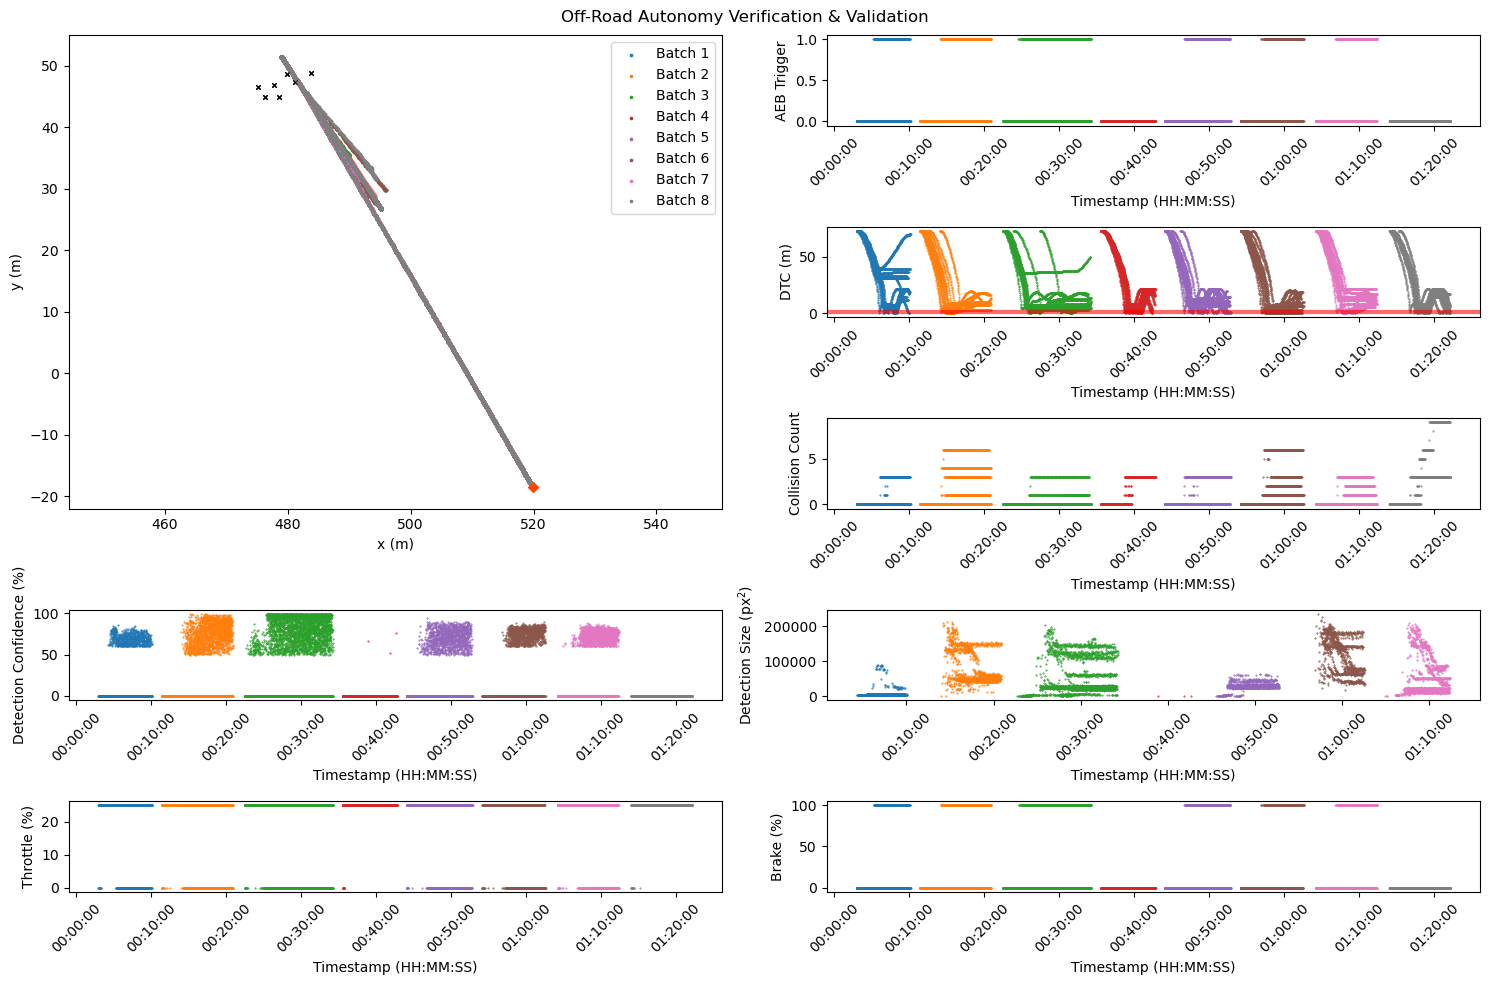

In [4]:
# Visualize the data

# Set figure size and sub-plot grid
fig = plt.figure(figsize=(15, 10))
fig.suptitle("Off-Road Autonomy Verification & Validation")
G = gridspec.GridSpec(5, 2)

for i in range(len(logs)):

    # Plot Y-position vs. X-position
    axes_1 = plt.subplot(G[0:3, 0])
    axes_1.scatter(logs[i]['PosX (m)'], logs[i]['PosY (m)'], s=2.5, marker='o')
    axes_1.scatter(519.84, -18.52, s=20.0, linewidth=1.0, marker='D', color='orangered', label='_nolegend_')
    axes_1.scatter(476.35, 44.97, s=10.0, linewidth=0.5, marker='x', color='black', label='_nolegend_')
    axes_1.scatter(477.69, 46.89, s=10.0, linewidth=0.5, marker='x', color='black', label='_nolegend_')
    axes_1.scatter(481.24, 47.40, s=10.0, linewidth=0.5, marker='x', color='black', label='_nolegend_')
    axes_1.scatter(478.62, 44.88, s=10.0, linewidth=0.5, marker='x', color='black', label='_nolegend_')
    axes_1.scatter(475.15, 46.60, s=10.0, linewidth=0.5, marker='x', color='black', label='_nolegend_')
    axes_1.scatter(483.85, 48.90, s=10.0, linewidth=0.5, marker='x', color='black', label='_nolegend_')
    axes_1.scatter(479.83, 48.69, s=10.0, linewidth=0.5, marker='x', color='black', label='_nolegend_')
    axes_1.axis('equal')
    axes_1.set_xlabel(r"x (m)")
    axes_1.set_ylabel(r"y (m)")
    plt.legend(['Batch 1', 'Batch 2', 'Batch 3', 'Batch 4', 'Batch 5', 'Batch 6', 'Batch 7', 'Batch 8'])

    # Plot AEB Trigger vs. Timestamp
    axes_2 = plt.subplot(G[0, 1])
    axes_2.scatter(logs[i]['Timestamp'], logs[i]['AEB (bool)'], s=0.2, marker='o')
    axes_2.tick_params(axis='x', labelrotation=45)
    axes_2.set_xlabel(r"Timestamp (HH:MM:SS)")
    axes_2.set_ylabel(r"AEB Trigger")
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))

    # Plot DTC vs. Timestamp
    axes_3 = plt.subplot(G[1, 1])
    axes_3.scatter(logs[i]['Timestamp'], logs[i]['DTC (m)'], s=0.2, marker='o')
    axes_3.axhline(y=1.0, color='r', linestyle='-', linewidth=3.0, alpha=0.1)
    axes_3.tick_params(axis='x', labelrotation=45)
    axes_3.set_xlabel(r"Timestamp (HH:MM:SS)")
    axes_3.set_ylabel(r"DTC (m)")
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))

    # Plot Collision Count vs. Timestamp
    axes_4 = plt.subplot(G[2, 1])
    axes_4.scatter(logs[i]['Timestamp'], (logs[i]['Collisions (#)']), s=0.2, marker='o')
    axes_4.tick_params(axis='x', labelrotation=45)
    axes_4.set_xlabel(r"Timestamp (HH:MM:SS)")
    axes_4.set_ylabel(r"Collision Count")
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))

    # Plot Detection Confidence vs. Timestamp
    axes_5 = plt.subplot(G[3, 0])
    axes_5.scatter(logs[i]['Timestamp'], (logs[i]['Confidence (%)']), s=0.2, marker='o')
    axes_5.tick_params(axis='x', labelrotation=45)
    axes_5.set_xlabel(r"Timestamp (HH:MM:SS)")
    axes_5.set_ylabel(r"Detection Confidence (%)")
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))

    # Plot Detection Size vs. Timestamp
    axes_6 = plt.subplot(G[3, 1])
    axes_6.scatter(logs[i]['Timestamp'], (logs[i]['Size (px^2)']), s=0.2, marker='o')
    axes_6.tick_params(axis='x', labelrotation=45)
    axes_6.set_xlabel(r"Timestamp (HH:MM:SS)")
    axes_6.set_ylabel(r"Detection Size (px$^2$)")
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))

    # Plot Throttle vs. Timestamp
    axes_7 = plt.subplot(G[4, 0])
    axes_7.scatter(logs[i]['Timestamp'], 100*(logs[i]['Throttle (%)']), s=0.2, marker='o')
    axes_7.tick_params(axis='x', labelrotation=45)
    axes_7.set_xlabel(r"Timestamp (HH:MM:SS)")
    axes_7.set_ylabel(r"Throttle (%)")
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))

    # Plot Brake vs. Timestamp
    axes_8 = plt.subplot(G[4, 1])
    axes_8.scatter(logs[i]['Timestamp'], 100*(logs[i]['Brake (%)']), s=0.2, marker='o')
    axes_8.tick_params(axis='x', labelrotation=45)
    axes_8.set_xlabel(r"Timestamp (HH:MM:SS)")
    axes_8.set_ylabel(r"Brake (%)")
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))

# Show the plot
plt.tight_layout()
plt.show()

In [5]:
total_failed_cases = 0
for i in range(len(logs)):
    mask = (logs[i]['Collisions (#)'] == 1)
    filtered_df = logs[i][mask]
    unique_instances = filtered_df.drop_duplicates(subset=['Time of Day (min)','Weather ID (#)'])
    failed_cases = unique_instances.shape[0]
    print('Batch {}: {}/16 \tPassed'.format(i, 16-failed_cases))
    total_failed_cases += failed_cases
print('Total: {}/128 \tPassed'.format(128-total_failed_cases))

Batch 0: 8/16 	Passed
Batch 1: 10/16 	Passed
Batch 2: 13/16 	Passed
Batch 3: 0/16 	Passed
Batch 4: 8/16 	Passed
Batch 5: 7/16 	Passed
Batch 6: 12/16 	Passed
Batch 7: 0/16 	Passed
Total: 58/128 	Passed


- Batch 0: yolov2-tiny
- Batch 1: yolov3
- Batch 2: yolov3
- Batch 3: yolov3-tiny
- Batch 4: yolov3-tiny
- Batch 5: yolov2
- Batch 6: yolov2
- Batch 7: yolov2-tiny